# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how= 'outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
# Checking the number of mice.
number_of_mice = len(merged_data_df['Mouse ID'].unique())
number_of_mice
                                     


249

In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data_df[['Mouse ID', 'Timepoint']].value_counts().reset_index(name="count")
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = duplicate_mice[duplicate_mice["count"]>1]
duplicate_mice

,Mouse ID,Timepoint,count
0,g989,20,2
1,g989,15,2
2,g989,10,2
3,g989,5,2
4,g989,0,2


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= merged_data_df[merged_data_df["Mouse ID"].isin(duplicate_mice["Mouse ID"].to_list())]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_DataFrame= merged_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleandata_DataFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count= len(cleandata_DataFrame['Mouse ID'].unique())
clean_mice_count

249

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_drug_regimen= cleandata_DataFrame.groupby("Drug Regimen")
mean= groupby_drug_regimen["Tumor Volume (mm3)"].mean()
median= groupby_drug_regimen["Tumor Volume (mm3)"].median()
variance= groupby_drug_regimen["Tumor Volume (mm3)"].var()
standard_deviation= groupby_drug_regimen["Tumor Volume (mm3)"].std()
sem= groupby_drug_regimen["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_statistics= pd.DataFrame ({"mean": mean,
                                   "median": median,
                                   "variance": variance,
                                   "std": standard_deviation,
                                   "sem": sem 

})
summary_statistics
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
one_liner_summary_statistics= cleandata_DataFrame.groupby("Drug Regimen").agg(
    {
        "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
    }
)

one_liner_summary_statistics


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

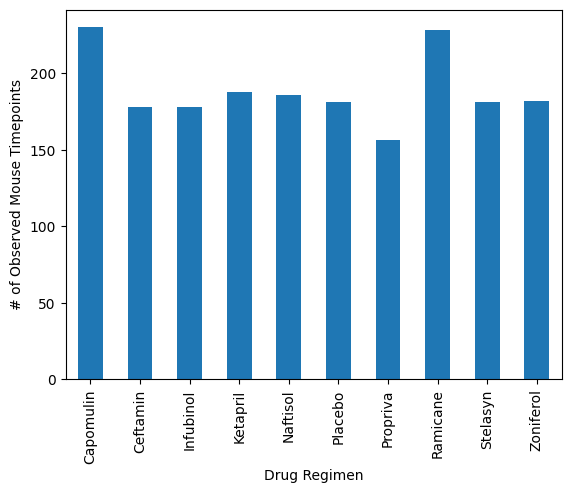

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_drug_regimen= groupby_drug_regimen["Drug Regimen"].count()
Panda_Bar_Chart=count_drug_regimen.plot.bar()
Panda_Bar_Chart.set_xlabel("Drug Regimen")
Panda_Bar_Chart.set_ylabel("# of Observed Mouse Timepoints")
Panda_Bar_Chart

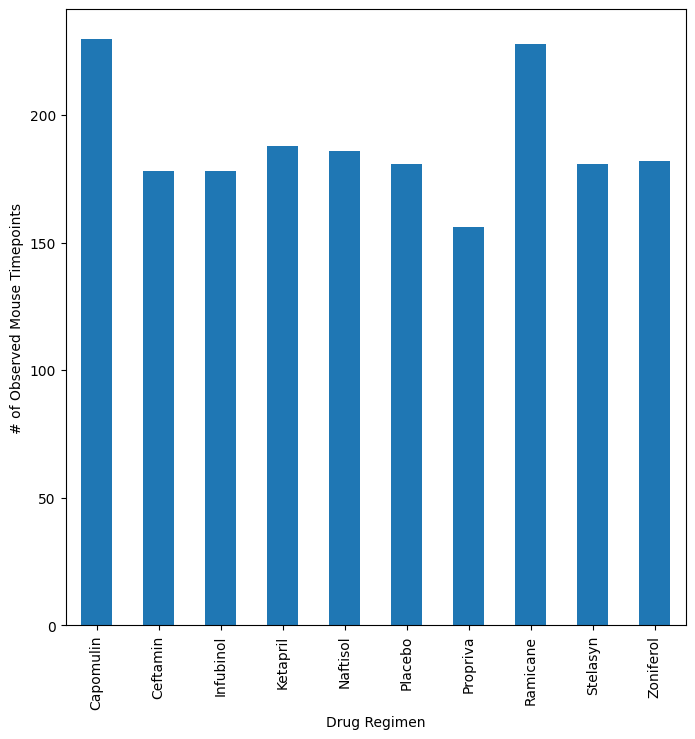

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_drug_regimen= groupby_drug_regimen["Drug Regimen"].count()
bar_chart= count_drug_regimen.plot(kind='bar', figsize=(8,8))
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout


<Axes: ylabel='Sex'>

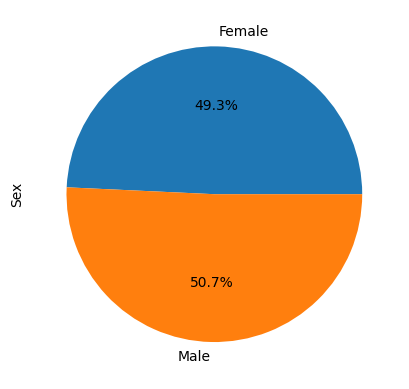

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex= cleandata_DataFrame.groupby("Sex")
count_sex= groupby_sex["Sex"].count()
Panda_Pie_Chart=count_sex.plot.pie(y='Sex',autopct='%1.1f%%')
Panda_Pie_Chart

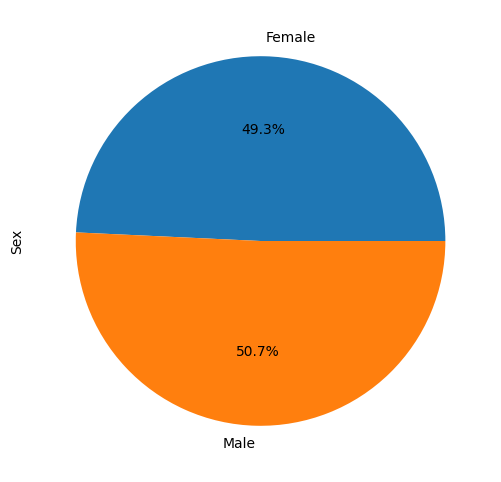

<Figure size 640x480 with 0 Axes>

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart= count_sex.plot(kind='pie', autopct= '%1.1f%%', figsize=(6,6))
pie_chart.set_ylabel("Sex")

plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Tumor_Volume_Data= cleandata_DataFrame[cleandata_DataFrame["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Tumor_Volume_Data

# Start by getting the last (greatest) timepoint for each mouse
Greatest_Timepoint= Tumor_Volume_Data.groupby(["Mouse ID"]).max()[["Timepoint"]]
Greatest_Timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_Volume_Dataframe= pd.merge(Greatest_Timepoint, Tumor_Volume_Data, how= 'left', on=['Mouse ID', 'Timepoint'])
Tumor_Volume_Dataframe


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [113]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in cleandata_DataFrame.iterrows():

    # Locate the rows which contain mice on each drug and get the tumor volumes
    if row ["Drug Regimen"] in Treatments:

            
    # add subset 
        Tumor_Vol_Data.append(row["Tumor Volume (mm3)"])
    

quartiles = Tumor_Volume_Dataframe["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
mean = Tumor_Volume_Dataframe["Tumor Volume (mm3)"].mean()
iqr = upperq- lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
outliers= Tumor_Volume_Data.loc[(Tumor_Vol_Data < lower_bound)
                                | (Tumor_Vol_Data > upper_bound)]

Tumor Volume (mm3)    Axes(0.125,0.11;0.775x0.77)
dtype: object

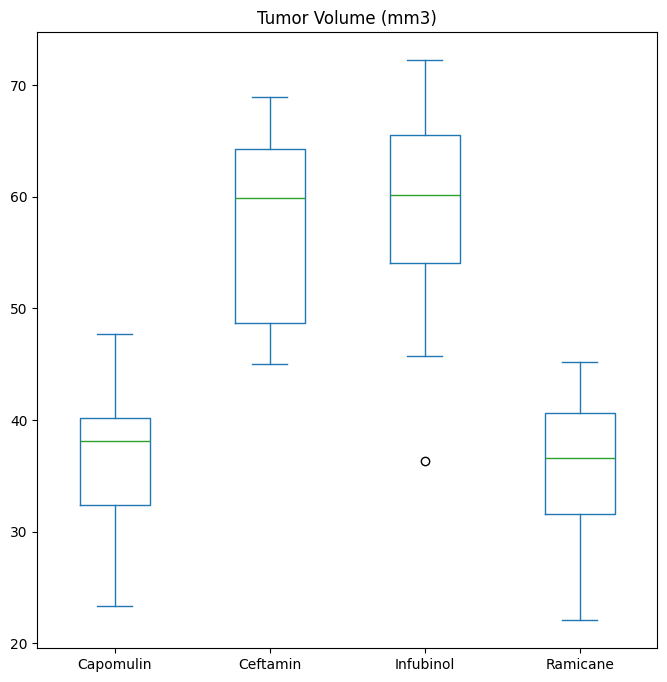

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Tumor_Volume_Dataframe.plot.box(column="Tumor Volume (mm3)", by = "Drug Regimen", figsize=(8,8))

## Line and Scatter Plots

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cleandata_DataFrame[Tumor_Volume_Dataframe["Mouse ID" ] == "l509"]

C:\Users\tamar\AppData\Local\Temp\ipykernel_29732\135516317.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleandata_DataFrame[Tumor_Volume_Dataframe["Mouse ID" ] == "l509"]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

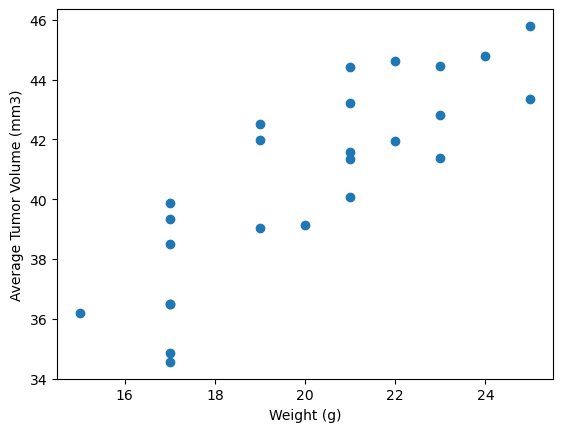

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


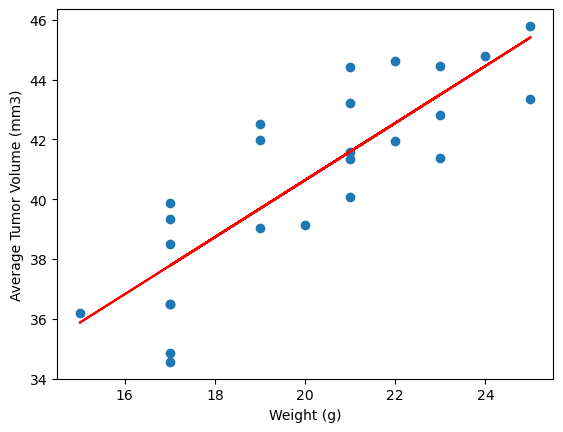

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
